# <font size='30'>**Los Angeles Crime Data Dive**</font>
<p align ="right">Zacharia Schmitz <br>
3 October 2023

---

<div style="background-color: #; padding: 0px; ">

## <font size='10'><i>**Plan**</i></font> <font size='5'><i>→ Acquire → Prepare → Explore → Model → Deliver</i></font>

---

- **2010 to 2019 Data** *(crime_data_2010_2019).csv*

https://data.lacity.org/Public-Safety/Crime-Data-from-2010-to-2019/63jg-8b9z

- **2020 to 25 Sep 23** *(crime_data_2020_2023).csv*

https://data.lacity.org/Public-Safety/Crime-Data-from-2020-to-Present/2nrs-mtv8

<u><i>Both dataframes shared the same features, and were merged together.</u> </i>

- **Merged CSV Format** *(crime_data.csv)*

- <font size='5'>**From the City of Los Angeles website about the data:**</font>

    - This dataset reflects incidents of crime in the City of Los Angeles from 2010 - 2019. 

    - This data is transcribed from original crime reports that are typed on paper and therefore there may be some inaccuracies within the data. 

    - Some location fields with missing data are noted as (0°, 0°). Address fields are only provided to the nearest hundred block in order to maintain privacy. 

    - This data is as accurate as the data in the LA database.

- <font size='5'>**After surface level exploration and developing clusters based on location and crimes with firearms:**</font>

    - Cluster 4 (Near Inglewood and Los Angeles International Airport) seemed to have a higher than average amount of robberies.

    - We'll be focusing on Cluster 4 versus the rest of the dataset.

- <font size='5'>**With this data, I intend to find out:**</font>

    - Does age affect the rate of robbery in cluster 4?

    - Does time of day affect robbery rate in cluster 4?

    - Does the victim's gender affect robbery rate in cluster 4?

    - Where are you most likely to be robbed in cluster 4?

    - Is the weapon used in cluster 4 different than the rest of Los Angeles?

<div style="background-color: #; padding: 0px; ">

## <font size='5'><i>Plan → </i></font> <font size='10'><i>**Acquire**</i></font> <font size='5'><i> → Prepare → Explore → Model → Deliver</i></font>

---

### Imports

In [67]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier, NearestNeighbors
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from scipy.stats import ttest_1samp, chi2_contingency
import folium
from folium.plugins import HeatMap
import crime_functions as cf

### Data

In [68]:
# Read in crime data (either )

data = cf.load_crime_data()

File found. Loaded crime_data.csv with 2943476 rows and 29 columns.


<div style="background-color: #; padding: 0px; ">

## <font size='5'><i>Plan → Acquire → </i></font> <font size='10'><i>**Prepare**</i></font> <font size='5'><i> → Explore → Model → Deliver</i></font>

--- 

In prepare, since we could potentially be trying to find trends in volume of crime, I found it important only drop rows if we absolutely have to. Most nulls will be assigned to 'Unknown'.

### Check for duplicates

No duplicates.

In [69]:
# Check data for duplicates
print(f"Total rows: {data.shape[0]}")
print(f"Total columns: {data.shape[1]}")
print(f"Total duplicates: {data.duplicated().sum()}")

Total rows: 2943476
Total columns: 29
Total duplicates: 0



### Surface Level Prep Using Univariate Analysis

Checking distribution of variables.

Total rows: 2943476
Total columns: 29
              DR_NO    TIME OCC       AREA   Rpt Dist No    Part 1-2  \
count  2.943476e+06  2943476.00  2136099.00   2943476.00  2943476.00   
mean   1.675696e+08     1352.87       11.14      1148.89        1.44   
std    3.971759e+07      649.20        6.03       604.83        0.50   
min    8.170000e+02        1.00        1.00       100.00        1.00   
25%    1.315230e+08      918.75        6.00       638.00        1.00   
50%    1.707074e+08     1430.00       12.00      1178.00        1.00   
75%    2.013160e+08     1900.00       16.00      1665.00        2.00   
max    9.102204e+08     2359.00       21.00      2199.00        2.00   

           Crm Cd    Vict Age   Premis Cd  Weapon Used Cd    Crm Cd 1  \
count  2943476.00  2943476.00  2943418.00       999660.00  2943456.00   
mean       505.48       31.20      309.82          368.86      505.27   
std        209.95       20.99      212.96          116.57      209.79   
min        110.00    

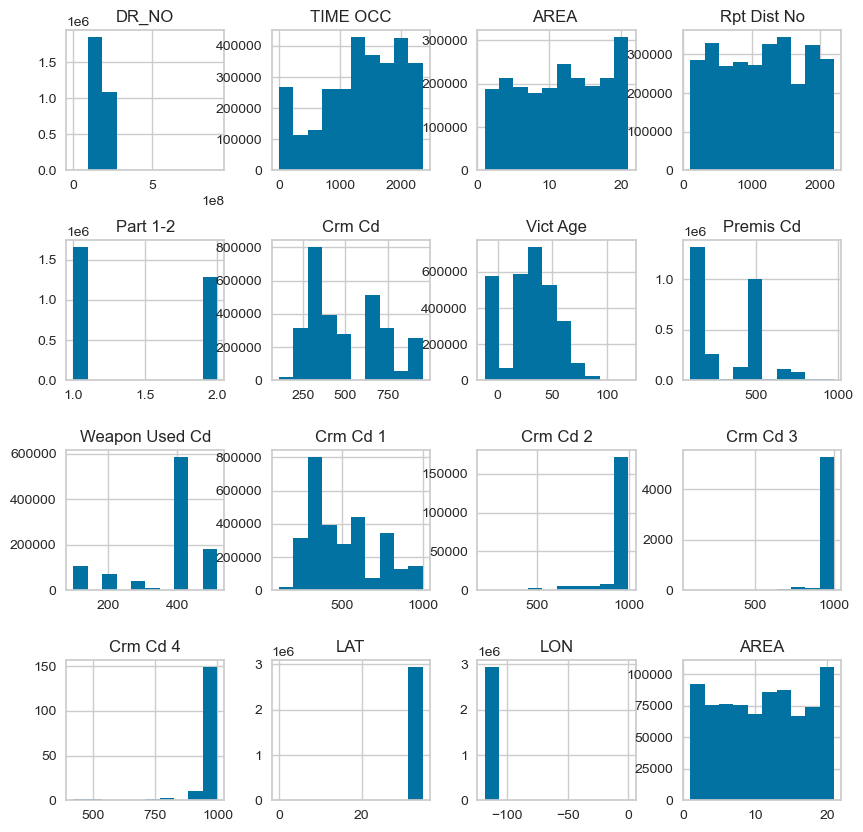

,col_name,dtype,num_unique,num_null,pct_null,unique_values,"range (min, max, mean)"
0,index,int64,2943476,0,0.00000,"RangeIndex(start=0, stop=2943476, step=1)",None
1,DR_NO,int64,2905489,0,0.00000,"[1307355, 11401303, 70309629, 90631215, 100100...","(817, 910220366, 167569579.86)"
2,Date Rptd,object,5016,0,0.00000,"[02/20/2010 12:00:00 AM, 09/13/2010 12:00:00 A...",None
3,DATE OCC,object,5016,0,0.00000,"[02/20/2010 12:00:00 AM, 09/12/2010 12:00:00 A...",None
4,TIME OCC,int64,1439,0,0.00000,"[1350, 45, 1515, 150, 2100, 1650, 2005, 230, 1...","(1, 2359, 1352.87)"
5,AREA,float64,21,807377,0.27429,"[13.0, 14.0, 6.0, 1.0, 11.0, 4.0, 3.0, 2.0, 17...","(1.0, 21.0, 11.14)"
6,AREA NAME,object,21,0,0.00000,"[Newton, Pacific, Hollywood, Central, Northeas...",None
7,Rpt Dist No,int64,1313,0,0.00000,"[1385, 1485, 1324, 646, 176, 162, 182, 157, 17...","(100, 2199, 1148.89)"
8,Part 1-2,int64,2,0,0.00000,"[2, 1]","(1, 2, 1.44)"
9,Crm Cd,int64,143,0,0.00000,"[900, 740, 946, 122, 442, 330, 230, 341, 624, ...","(110, 956, 505.48)"


In [70]:
cf.check_columns(data, graphs=True, reports=True)

### Process Data Function

In [71]:
data = cf.process_data(data)

#### Logically Rename Columns

- Rename columns to make sense for exploration.

#### Choose columns to work with

- Based on what we're looking for, we'll start with only looking at these

#### Fix Time Occurred

- Change time occurred to 4 digit 24 hour time. We won't move it to index. Because we may not be doing any time series

#### Fix Victim Age 

- Looks like we have negative values in the victim_age. We will have to drop those, since no fair assumption can be made.

#### Fix Victim Descent

- We'll map the victim_descent based on abbreviations and assign nulls 'unknown' for exploration before potentially dropping nulls.

#### Fix Victim Sex

- We'll have to map victim_sex. We can assume F = Female, M = Male, X = Non binary. Due to large amount of other values, we will make them 'unknown' rather than imputing any assumptions.

#### Nulls in premise_description 

- Very small amount of nulls in premise_description (0.00023). We'll assign them 'unknown'.

#### Weapon_description 

- 66% Nulls in weapon_description, we'll fill them with 'No Weapon'.

#### Weapon_category

- Make a weapon bin out of all of the weapon_descriptions. No Weapon, Firearm, Melee Object, Threats, Vehicle, Other

#### Create report_delay column

- Take the date of reporting, subtract the reported date

#### Fix Part 1 & 2

- Part 1 is for heinous crimes & 2 is for less heinous.

#### Fix latitude and longitude

- A total of 3321 values of 0 in both lat/long. We'll sort by the area name, and forward fill for best guess.

#### Filter down DF to guns only

- Due to scope of data and time for project, we will only focus on firearm related crimes.

#### Bin Robbery and Attempted Robbery

- We made a column named is_robbery and if the crime was robbery or attempted robbery, we marker it true.

#### Bin Time of Day

- We binned the time of crime to time of day to morning, afternoon, evening, and night.

#### Make a column for crimes that happened on the street.

- It was identified that crimes that a majority of robberies happened on the street. We'll make a binary column for it.

### Data Splits

Split data prior to developing clusters and preparing for clusters/modeling.

In [72]:
train, validate, test = cf.split_data(data, random_state=321)

train: 64026 (60% of 106712)
validate: 21343 (20% of 106712)
test: 21343 (20% of 106712)


### Make Clusters Identified During Exploration

Developed clusters using KMeans and DBSCAN

I preferred DBSCAN due to it's separation of outliers.

#### Scaling for Clustering

Scale the lat/long for model optimization.

In [73]:
scaler = StandardScaler()

coordinates = train[["lat", "lon"]]
train_scaled_coordinates = scaler.fit_transform(coordinates)

In [74]:
coordinates = validate[["lat", "lon"]]
validate_scaled_coordinates = scaler.transform(coordinates)

In [75]:
coordinates = test[["lat", "lon"]]
test_scaled_coordinates = scaler.transform(coordinates)

#### Make clusters for gun crimes

Only clustered using a dataframe filtered to gun crimes and scaled latitude / longitude.

In [ ]:
# Plot KMeans Clusters

cf.plot_crime_clusters(train)

### Large high resolution map image. Output cleared for reducing github file size.
### Download and run to view.

![Alt text](image.png)

![Alt text](image-5.png)

While this seems to point out the clustering well, the data also has some outliers (random gun crime) outside of the clusters. We'll utilize DBSCAN to hopefully leave out those.

In [ ]:
cf.plot_dbscan_clusters(train, eps=0.075, min_samples=25)

### Large high resolution map image. Output cleared for reducing github file size.
### Download and run to view.

![Alt text](image-2.png)

![Alt text](image-3.png)

In [78]:
train["cluster"].value_counts()

cluster
 0    49225
 1    12229
 2     1143
-1      821
 4      374
 3      141
 5       93
Name: count, dtype: int64

#### Apply DBSCAN clusters to validate and test sets

DBSCAN can't be used to apply (transform) clusters to other sets. It has to be done with a nearest neighbor model set to 1.

In [79]:
# Apply the clusters to validate and test

# Extract the coordinates and cluster labels from the training data
coordinates_train = train[["lat", "lon"]].values
clusters_train = train["cluster"].values

# Train the Nearest Neighbors model
nn_model = NearestNeighbors(n_neighbors=1).fit(coordinates_train)

# Model is now ready to assign clusters to new data
nn_model

# Apply clusters to validate and test

# Find the nearest neighbor for each validation point
distances, indices = nn_model.kneighbors(validate[["lat", "lon"]])
validate["cluster"] = clusters_train[indices]

# Find the nearest neighbor for each test point
distances, indices = nn_model.kneighbors(test[["lat", "lon"]])
test["cluster"] = clusters_train[indices]

All datasets now have the clusters that were determined with the train set. 

Once the clusters were made with the train set, we used NearestNeighbor (fit to the train clusters) to assign the clusters to both the validate and test sets.

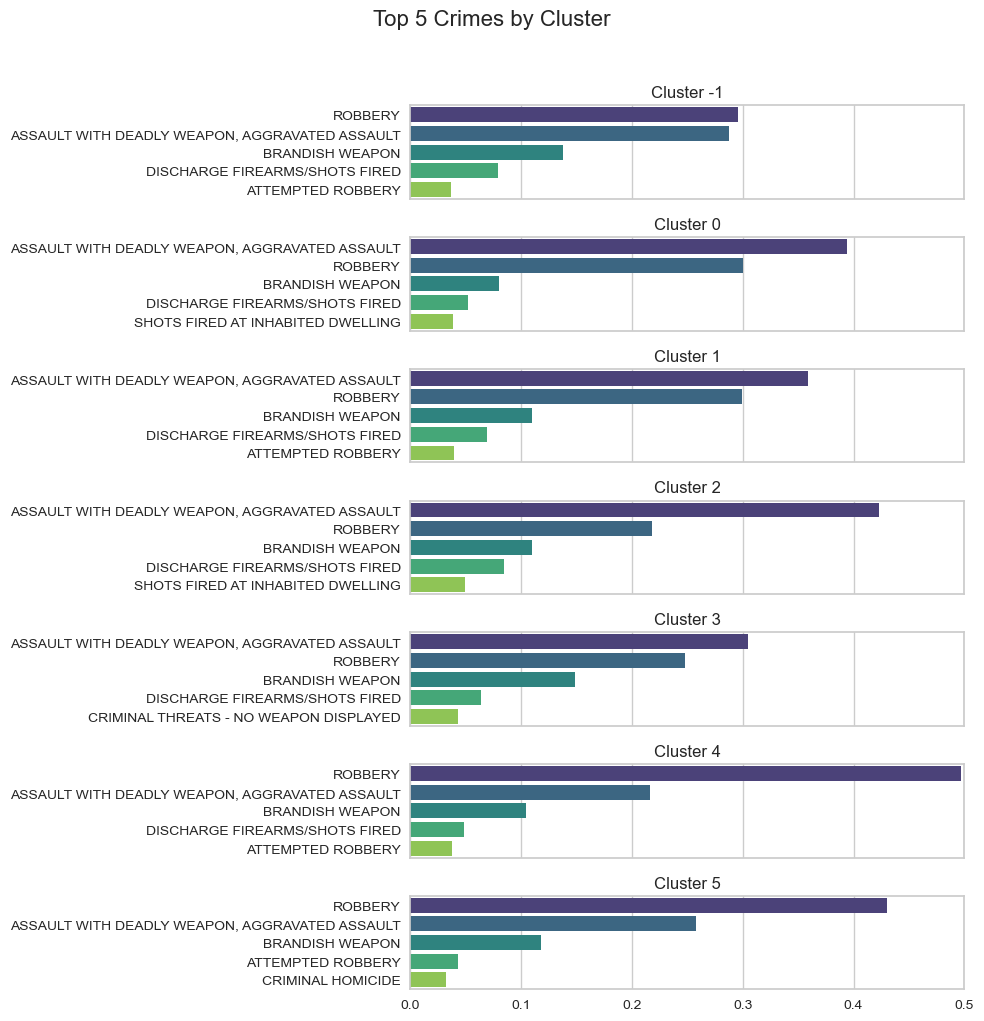

In [80]:
cf.plot_top_crimes_by_cluster(train)

Cluster 4 has a much higher chance of robbery than the other clusters.

<div style="background-color: #; padding: 0px; ">

## <font size='5'><i>Plan → Acquire → Prepare → </i></font> <font size='10'><i>**Explore**</i></font> <font size='5'><i>→ Model → Deliver</i></font>
---

With what we identified in clustering, we'll be looking at cluster 4 versus the rest of the dataset.

Since we identified cluster 4 as appearing to be significantly different than the other clusters, we'll be doing cluster 4 vs all other clusters from here on out.



### Multivariate Exploration

In [81]:
# Prep data

train_cluster4 = train[train["cluster"] == 4]
train_clusters = train[train["cluster"] != 4]
cluster_4_robbery = train[(train["cluster"] == 4) & (train["is_robbery"] == 1)]

In [82]:
cf.calculate_robbery_proportions(train, 4)

Cluster 4:
Robbery Proportion: 0.50
Attempted Robbery Proportion: 0.04

Other Clusters:
Robbery Proportion: 0.30
Attempted Robbery Proportion: 0.03


In [83]:
# Extracting features related to robberies in Cluster 4
robbery_features = train_cluster4[train_cluster4["crime_code_description"] == "ROBBERY"]

# Basic statistics for these features
robbery_features_describe = robbery_features.describe(include="all")

robbery_features_describe[
    [
        "area_name",
        "time_occurred",
        "premise_description",
        "weapon_description",
        "victim_age",
        "victim_sex",
        "victim_descent",
    ]
]

,area_name,time_occurred,premise_description,weapon_description,victim_age,victim_sex,victim_descent
count,186,186.000000,186,186,186.000000,186,186
unique,1,NaN,36,7,NaN,3,5
top,Pacific,NaN,STREET,HAND GUN,NaN,M,Black
freq,186,NaN,38,98,NaN,129,57
mean,NaN,13.424731,NaN,NaN,24.575269,NaN,NaN
min,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN
25%,NaN,7.250000,NaN,NaN,0.000000,NaN,NaN
50%,NaN,16.000000,NaN,NaN,24.500000,NaN,NaN
75%,NaN,20.000000,NaN,NaN,36.750000,NaN,NaN
max,NaN,23.000000,NaN,NaN,75.000000,NaN,NaN


In [ ]:
data = [
    [row["lat"], row["lon"], row["is_robbery"]]
    for idx, row in train_cluster4.iterrows()
]

# Create a Base Map
la_map = folium.Map(
    location=[np.mean(train_cluster4["lat"]), np.mean(train_cluster4["lon"])],
    zoom_start=13,
)

# Add Heatmap Layer
HeatMap(
    data, overlay=False, min_opacity=0.4, gradient={0.0: "green", 1.0: "red"}
).add_to(la_map)

# Display
la_map

### Large high resolution map image. Output cleared for reducing github file size.
### Download and run to view.

![Alt text](image-4.png)

#### Time of Day

What time of day are you most likely to get robbed in Cluster 4?

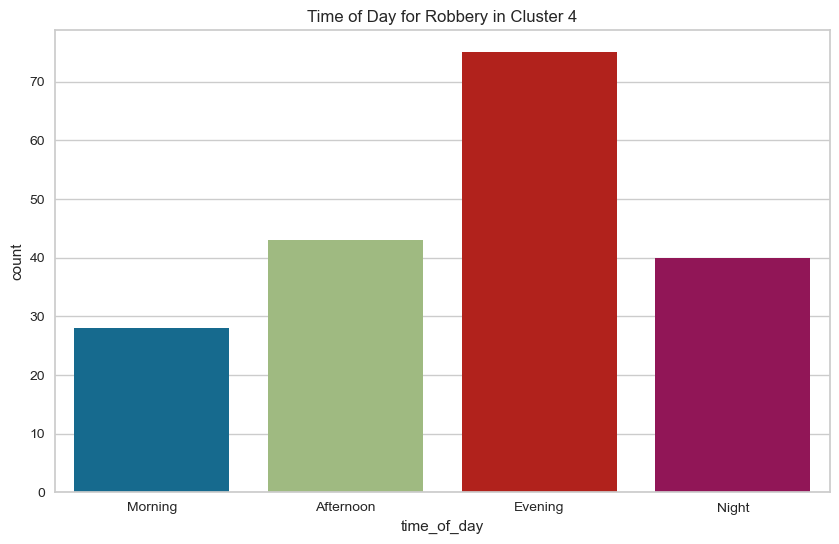

In [85]:
# Plot the time of day for robbery in cluster for
plt.figure(figsize=(10, 6))
sns.countplot(
    x="time_of_day",
    data=robbery_features,
    order=["Morning", "Afternoon", "Evening", "Night"],
)
plt.title("Time of Day for Robbery in Cluster 4")
plt.show()

#### Location 

Where are you most likely to be robbed in Cluster 4?

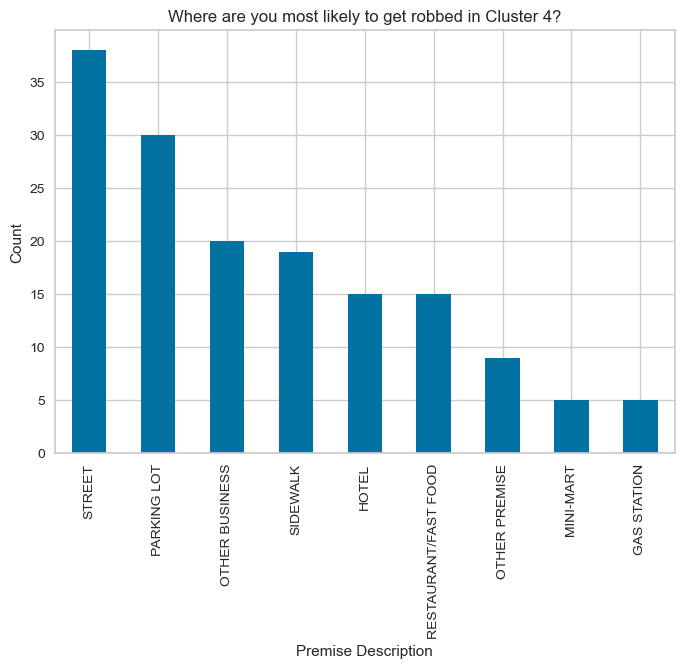

In [86]:
cluster_4_robbery["premise_description"].value_counts().head(9).plot(kind="bar")
plt.title("Where are you most likely to get robbed in Cluster 4?")
plt.xlabel("Premise Description")
plt.ylabel("Count")
plt.show()


### Feature Comparison and Stats Testing

---

#### <u>Victim Age:</u>

**Null Hypothesis:** The mean age of victims in Cluster 4 is the same as the mean age in the entire dataset.

**Alternative Hypothesis:** The mean age of victims in Cluster 4 is different from the mean age in the entire dataset.

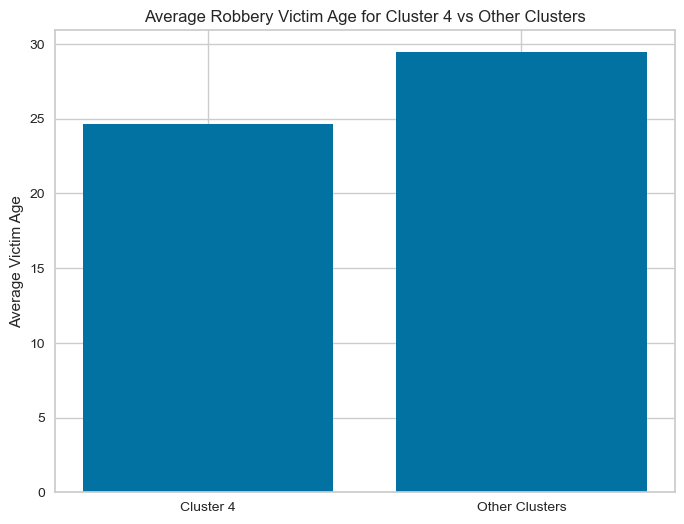

In [87]:
cf.plot_average_robbery_victim_age(train, 4)

In [88]:
# Average victim age in the entire dataset
mean_age_overall = train["victim_age"].mean()

# Running one-sample t-test
t_stat_age, p_val_age = ttest_1samp(
    robbery_features["victim_age"].dropna(), mean_age_overall
)

t_stat_age, p_val_age

(-3.210289511214181, 0.0015635458893304367)

<u><i>We reject the null hypothesis. The mean age of victims in Cluster 4 is significantly different from the mean age of victims in the entire dataset.

---

#### <u>Victim Sex:</u>

**Null Hypothesis:** The distribution of victim's sex in Cluster 4 is the same as the distribution in the entire dataset.

**Alternative Hypothesis:** The distribution of victim's sex in Cluster 4 is different from the distribution in the entire dataset.

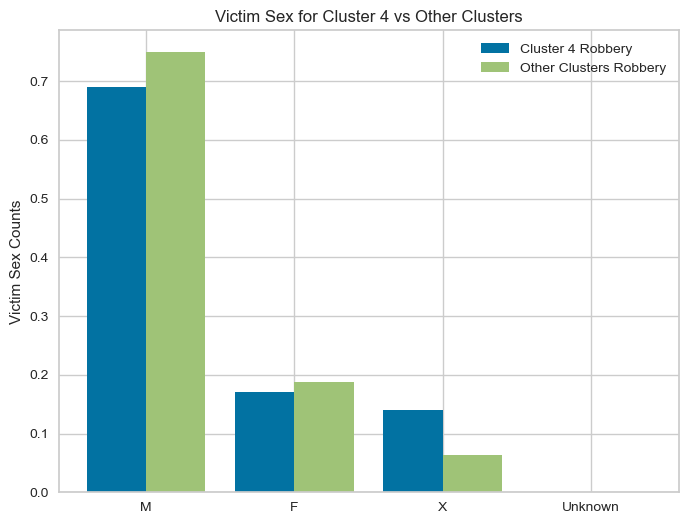

In [89]:
cf.plot_victim_sex_counts(train, 4)

In [90]:
# Chi-square test for Victim Sex
observed_sex = robbery_features["victim_sex"].value_counts()
expected_sex = train["victim_sex"].value_counts() * len(robbery_features) / len(train)
contingency_sex = pd.DataFrame(
    {"Observed": observed_sex, "Expected": expected_sex}
).fillna(0)
chi2_stat_sex, p_val_sex, _, _ = chi2_contingency(contingency_sex.transpose())

chi2_stat_sex, p_val_sex

(9.200287749389457, 0.026743136380908646)

<u><i>We reject the null hypothesis. The distribution of victim's sex in Cluster 4 differs significantly from the expected distribution based on the entire dataset.

---

#### <u>Weapon Description:</u>

**Null Hypothesis:** The distribution of weapon types in Cluster 4 is the same as the distribution in the entire dataset.

**Alternative Hypothesis:** The distribution of weapon types in Cluster 4 is different from the distribution in the entire dataset.

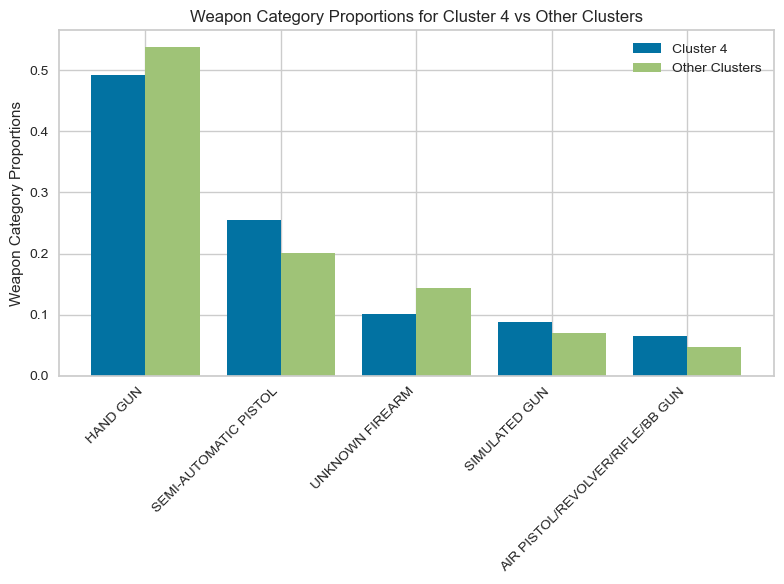

In [91]:
cf.plot_weapon_category_proportions(train, 4)

In [92]:
# Observed frequencies for weapon description in Cluster 4
observed_weapon = robbery_features["weapon_description"].value_counts()

# Expected frequencies based on entire dataset
expected_weapon = (
    train["weapon_description"].value_counts() * len(robbery_features) / len(train)
)

# Creating a contingency table
contingency_weapon = pd.DataFrame(
    {"Observed": observed_weapon, "Expected": expected_weapon}
).fillna(0)

# Running chi-square test
chi2_stat_weapon, p_val_weapon, _, _ = chi2_contingency(contingency_weapon.transpose())

chi2_stat_weapon, p_val_weapon

(28.347751554879448, 0.1644408292910793)

<u><i>We fail to reject the null hypothesis. The distribution of weapon types in Cluster 4 does not differ significantly from the rest of the dataset.

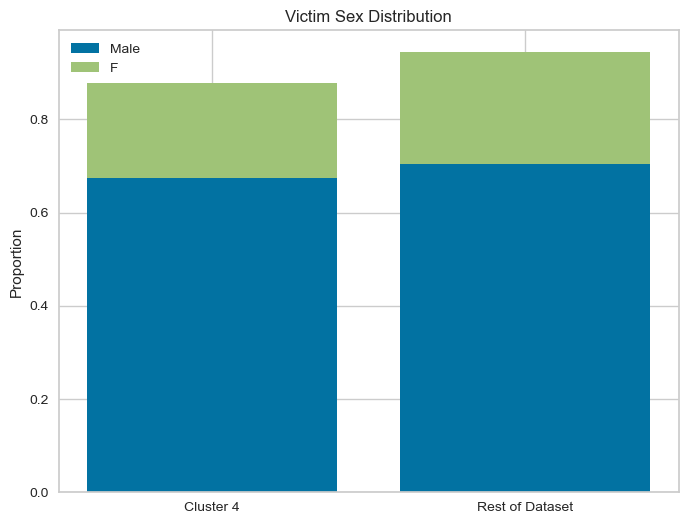

In [93]:
# Get the victim sex distribution for cluster 4
cluster_4_victim_sex = train[train["cluster"] == 4]["victim_sex"].value_counts(
    normalize=True
)

# Get the victim sex distribution for the rest of the dataset
rest_victim_sex = train[train["cluster"] != 4]["victim_sex"].value_counts(
    normalize=True
)

# Plot the victim sex distribution for cluster 4 vs the rest of the dataset using a stacked bar chart
fig, ax = plt.subplots(figsize=(8, 6))
ax.bar(
    ["Cluster 4", "Rest of Dataset"],
    [cluster_4_victim_sex["M"], rest_victim_sex["M"]],
    label="Male",
)
ax.bar(
    ["Cluster 4", "Rest of Dataset"],
    [cluster_4_victim_sex["F"], rest_victim_sex["F"]],
    bottom=[cluster_4_victim_sex["M"], rest_victim_sex["M"]],
    label="F",
)
ax.set_ylabel("Proportion")
ax.set_title("Victim Sex Distribution")
ax.legend()
plt.show()

---

#### <u>Victim Descent:</u>

**Null Hypothesis:** The distribution of victim's descent in Cluster 4 is the same as the distribution in the entire dataset.

**Alternative Hypothesis:** The distribution of victim's descent in Cluster 4 is different from the distribution in the entire dataset.

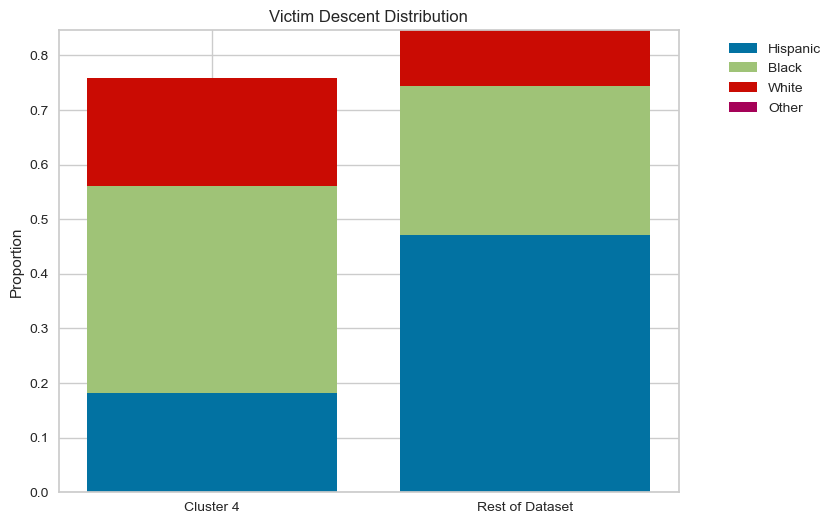

In [94]:
cf.plot_victim_descent_distribution(
    train[train["cluster"] == 4], train[train["cluster"] != 4]
)

In [95]:
# Chi-square test for Victim Descent
observed_descent = robbery_features["victim_descent"].value_counts()
expected_descent = (
    train["victim_descent"].value_counts() * len(robbery_features) / len(train)
)
contingency_descent = pd.DataFrame(
    {"Observed": observed_descent, "Expected": expected_descent}
).fillna(0)
chi2_stat_descent, p_val_descent, _, _ = chi2_contingency(
    contingency_descent.transpose()
)

chi2_stat_descent, p_val_descent

(44.11058475952372, 2.9420541638437497e-05)

<u><i>We reject the null hypothesis. The distribution of victim's descent in Cluster 4 differs significantly from the expected distribution based on the entire dataset.

### Model Preparation

Based on the features identified, there seems to be enough information to prepare a model.

<div style="background-color: #; padding: 0px; ">

## <font size='5'><i>Plan → Acquire → Prepare → Explore → </i></font> <font size='10'><i>**Model**</i></font> <font size='5'><i>→ Deliver</i></font>
---

### Binary for Models

In [96]:
# 2. Filter Data for Cluster 4
train1 = train[train["cluster"] == 4].copy()

# 3. Encode Categorical Features using pd.get_dummies
train2 = pd.get_dummies(train1[["victim_sex", "victim_descent"]], drop_first=False)

# 4. Create Binary Feature for 'Street' and Target Variable for 'Robbery'
train3 = pd.concat([train1, train2], axis=1)

train4 = pd.concat(
    [train3["victim_age"], train3["is_street"], train1["is_robbery"], train2], axis=1
)

In [97]:
# 2. Filter Data for Cluster 4
validate1 = validate[validate["cluster"] == 4].copy()

# 3. Encode Categorical Features using pd.get_dummies
validate2 = pd.get_dummies(
    validate1[["victim_sex", "victim_descent"]], drop_first=False
)

# 4. Create Binary Feature for 'Street' and Target Variable for 'Robbery'
validate3 = pd.concat([validate1, validate2], axis=1)

validate4 = pd.concat(
    [
        validate3["victim_age"],
        validate3["is_street"],
        validate1["is_robbery"],
        validate2,
    ],
    axis=1,
)

In [98]:
# 2. Filter Data for Cluster 4
test1 = test[test["cluster"] == 4].copy()

# 3. Encode Categorical Features using pd.get_dummies
test2 = pd.get_dummies(test1[["victim_sex", "victim_descent"]], drop_first=False)

# 4. Create Binary Feature for 'Street' and Target Variable for 'Robbery'
test3 = pd.concat([test1, test2], axis=1)

test4 = pd.concat(
    [test3["victim_age"], test3["is_street"], test1["is_robbery"], test2], axis=1
)

In [99]:
# Drop target variable before modeling
X_train = train4.drop(columns=["is_robbery"])
y_train = train4["is_robbery"]

# Tune on validate
X_validate = validate4.drop(columns=["is_robbery"])
y_validate = validate4["is_robbery"]

# Best model on test
X_test = test4.drop(columns=["is_robbery"])
y_test = test4["is_robbery"]

In [100]:
cf.check_columns(train4)

Total rows: 374
Total columns: 11


,col_name,dtype,num_unique,num_null,pct_null,unique_values,"range (min, max, mean)"
0,index,int64,374,0,0.0,"Index([1286959, 2538165, 1396133, 1198578, 147...","(68209, 2937011)"
1,victim_age,int64,58,0,0.0,"[21, 0, 40, 22, 30, 46, 29, 23, 31, 37, 24, 26...","(0, 76, 26.82)"
2,is_street,bool,2,0,0.0,"[True, False]","(False, True, 0.23)"
3,is_robbery,int64,2,0,0.0,"[1, 0]","(0, 1, 0.53)"
4,victim_sex_F,bool,2,0,0.0,"[False, True]","(False, True, 0.2)"
5,victim_sex_M,bool,2,0,0.0,"[True, False]","(False, True, 0.67)"
6,victim_sex_X,bool,2,0,0.0,"[False, True]","(False, True, 0.12)"
7,victim_descent_Asian,bool,2,0,0.0,"[False, True]","(False, True, 0.02)"
8,victim_descent_Black,bool,2,0,0.0,"[False, True]","(False, True, 0.38)"
9,victim_descent_Hispanic,bool,2,0,0.0,"[False, True]","(False, True, 0.18)"



For Modeling, we'll use:

Victim's Age (victim_age): A continuous variable representing the age of the victim.

Premise Description (is_street): A binary feature indicating whether the crime occurred on the street.

Target variable (is_robbery): A binary feature indicating if the crime was a robbery or not

Victims sex encoded

Victims descent encoded (Only used top 4)
Victim's Sex and Descent: These categorical features were one-hot encoded. For example:
victim_sex_F: Binary feature indicating if the victim's sex is female.
victim_sex_M: Binary feature indicating if the victim's sex is male.

Other columns for the different descents, with the first category (alphabetically) dropped to avoid multicollinearity.
So, the final feature set included the victim's age, whether the crime occurred on the street, and one-hot encoded features for the victim's sex and descent.

### Baseline (53%)

In [101]:
# Compute Baseline Accuracy
most_frequent_class = train4["is_robbery"].mode()[0]
baseline_predictions = [most_frequent_class] * len(train4)
baseline_accuracy = accuracy_score(train4["is_robbery"], baseline_predictions)

print(baseline_accuracy)

0.5347593582887701


### GridSearchCV

#### KNN

In [102]:
# Define the hyperparameters to tune for KNN
param_grid_knn = {
    "n_neighbors": [3, 5, 7, 9],
    "weights": ["uniform", "distance"],
    "metric": ["euclidean", "manhattan", "minkowski"],
}

# Create a KNN model
knn = KNeighborsClassifier()

# Create a grid search object for KNN
grid_search_knn = GridSearchCV(knn, param_grid_knn, cv=5, scoring="accuracy")

# Fit the grid search object to the training data
grid_search_knn.fit(X_train, y_train)

# Print the best hyperparameters and the corresponding accuracy score for KNN
print("KNN - Best Hyperparameters:", grid_search_knn.best_params_)

KNN - Best Hyperparameters: {'metric': 'euclidean', 'n_neighbors': 7, 'weights': 'uniform'}


In [103]:
# Train a Logistic Regression Model
knn = KNeighborsClassifier(metric="euclidean", n_neighbors=7, weights="uniform")
knn.fit(X_train, y_train)

# Evaluate the Model on Train
y_train_pred = knn.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
print(f"Train Set Accuracy: {train_accuracy}")

# Evaluate the Model on Validate
y_val_pred = knn.predict(X_validate)
val_accuracy = accuracy_score(y_validate, y_val_pred)
print(f"Validate Set Accuracy: {val_accuracy}")

Train Set Accuracy: 0.6978609625668449
Validate Set Accuracy: 0.5882352941176471


#### RFC

In [104]:
from sklearn.ensemble import RandomForestClassifier

# Define the hyperparameters to tune for Random Forest
param_grid_rf = {
    "n_estimators": [50, 100, 200],
    "max_depth": [10, 20, 30],
    "max_features": ["auto", "sqrt", "log2"],
}

# Create a Random Forest model
rf = RandomForestClassifier(random_state=321)

# Create a grid search object for Random Forest
grid_search_rf = GridSearchCV(rf, param_grid_rf, cv=5, scoring="accuracy")

# Fit the grid search object to the training data
grid_search_rf.fit(X_train, y_train)

# Print the best hyperparameters and the corresponding accuracy score for Random Forest
print("Random Forest - Best Hyperparameters:", grid_search_rf.best_params_)

Random Forest - Best Hyperparameters: {'max_depth': 10, 'max_features': 'auto', 'n_estimators': 50}


In [105]:
# Train a Logistic Regression Model
rf = RandomForestClassifier(max_depth=10, n_estimators=100)
rf.fit(X_train, y_train)

# Evaluate the Model on Train
y_train_pred = rf.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
print(f"Train Set Accuracy: {train_accuracy}")

# Evaluate the Model on Validate
y_val_pred = rf.predict(X_validate)
val_accuracy = accuracy_score(y_validate, y_val_pred)
print(f"Validate Set Accuracy: {val_accuracy}")

Train Set Accuracy: 0.8609625668449198
Validate Set Accuracy: 0.6691176470588235


#### LR

In [106]:
from sklearn.linear_model import LogisticRegression

# Define the hyperparameters to tune
param_grid = {
    "C": [0.1, 1, 10],
    "penalty": ["l1", "l2"],
    "solver": ["liblinear", "lbfgs", "saga"],
    "max_iter": [100, 500, 1000],
}

# Create a logistic regression model
logreg = LogisticRegression(random_state=321)

# Create a grid search object
grid_search = GridSearchCV(logreg, param_grid, cv=5, scoring="accuracy")

# Fit the grid search object to the training data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters and the corresponding accuracy score
print("Best Hyperparameters:", grid_search.best_params_)

Best Hyperparameters: {'C': 0.1, 'max_iter': 100, 'penalty': 'l2', 'solver': 'liblinear'}


In [107]:
# Train a Logistic Regression Model
logreg = LogisticRegression(
    C=0.1, max_iter=100, penalty="l2", solver="liblinear", random_state=321
)
logreg.fit(X_train, y_train)

# Evaluate the Model on Train
y_train_pred = logreg.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
print(f"Train Set Accuracy: {train_accuracy}")

# Evaluate the Model on Validate
y_val_pred = logreg.predict(X_validate)
val_accuracy = accuracy_score(y_validate, y_val_pred)
print(f"Validate Set Accuracy: {val_accuracy}")

Train Set Accuracy: 0.5721925133689839
Validate Set Accuracy: 0.6617647058823529


### Test Set

In [108]:
# 7. Train a Logistic Regression Model
logreg = LogisticRegression(
    C=10, max_iter=1000, penalty="l1", solver="saga", random_state=321
)
logreg.fit(X_train, y_train)

# 8. Evaluate the Model
y_pred = logreg.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)
print(f"Test Set Accuracy: {test_accuracy}")

Test Set Accuracy: 0.5752212389380531


<div style="background-color: #; padding: 0px; ">

## <font size='5'><i>Plan → Acquire → Prepare → Explore → Model →</i></font> <font size='10'><i>**Deliver**</i></font>
---

### <font size='5'>**Takeaways and Key Findings**</font>

### <font size='5'>**Takeaways:**</font>

- Los Angeles has a lot of crime

- The type of crime, for most areas, does seem to be dependent on the features we identified

- We only used 4 of the 29 features for modeling, this shows the imporance of the identified features

- With more time, feature tuning and possibly combining features could improve the model.

<br>

<font size='5'>**We positively identified and answered our questions, specifically to cluster 4**</font>

**1. Does age affect the rate of robbery in cluster 4?**
- Age does affect the rate of robbert in cluster 4. <br> <br>

**2. Does time of day affect robbery rate in cluster 4?**
- People are much more likely to be robbed in the evening. <br> <br>

**3. Does the victim's gender affect robbery rate in cluster 4?**
- Gender did not strongly affect the robbery rate. <br> <br>

**4. Where are you most likely to be robbed in cluster 4?**
- Most outside areas are very likely to be robbed. Number one being on the street/sidewalk. <br> <br>

**5. Is the weapon used in cluster 4 different than the rest of Los Angeles?**
- We found the weapon used, is not different in cluster 4, compared to the rest of LA. <br> <br>

**<i>Given that this model performed 5% better than baseline on our test set, we would expect it to also perform well on unseen data**</i>

### <font size='5'>**Recommendations**</font>

- Continue to run feature engineering and potentially test other models with other hyperparameters

- Possibly create models for the other identified clusters

- Potentially include some form of time series analysis to obtain trends

### <font size='5'>**Next Steps**</font>

- Given more time and access suspect information could drastically improve the model.

- Also with more access, the closed case details could cut down on incorrect, and most importantly biased initial reporting.